In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Copy the original data form
dfc = df.copy()

In [3]:
# Data Clean Up
dfc['job_posted_date'] = pd.to_datetime(dfc['job_posted_date'])
dfc['job_skills'] = dfc['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
dfc_US = dfc[dfc['job_country'] == 'United States']
dfc_skills = dfc_US.explode('job_skills')
dfc_skills_count = dfc_skills.groupby(['job_skills', 'job_title_short']).size()
# Convert from series to dataframe
dfc_skills_count = dfc_skills_count.reset_index(name='skill_count')
dfc_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [27]:
# Get top 5 roles
job_titles = dfc_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:5])

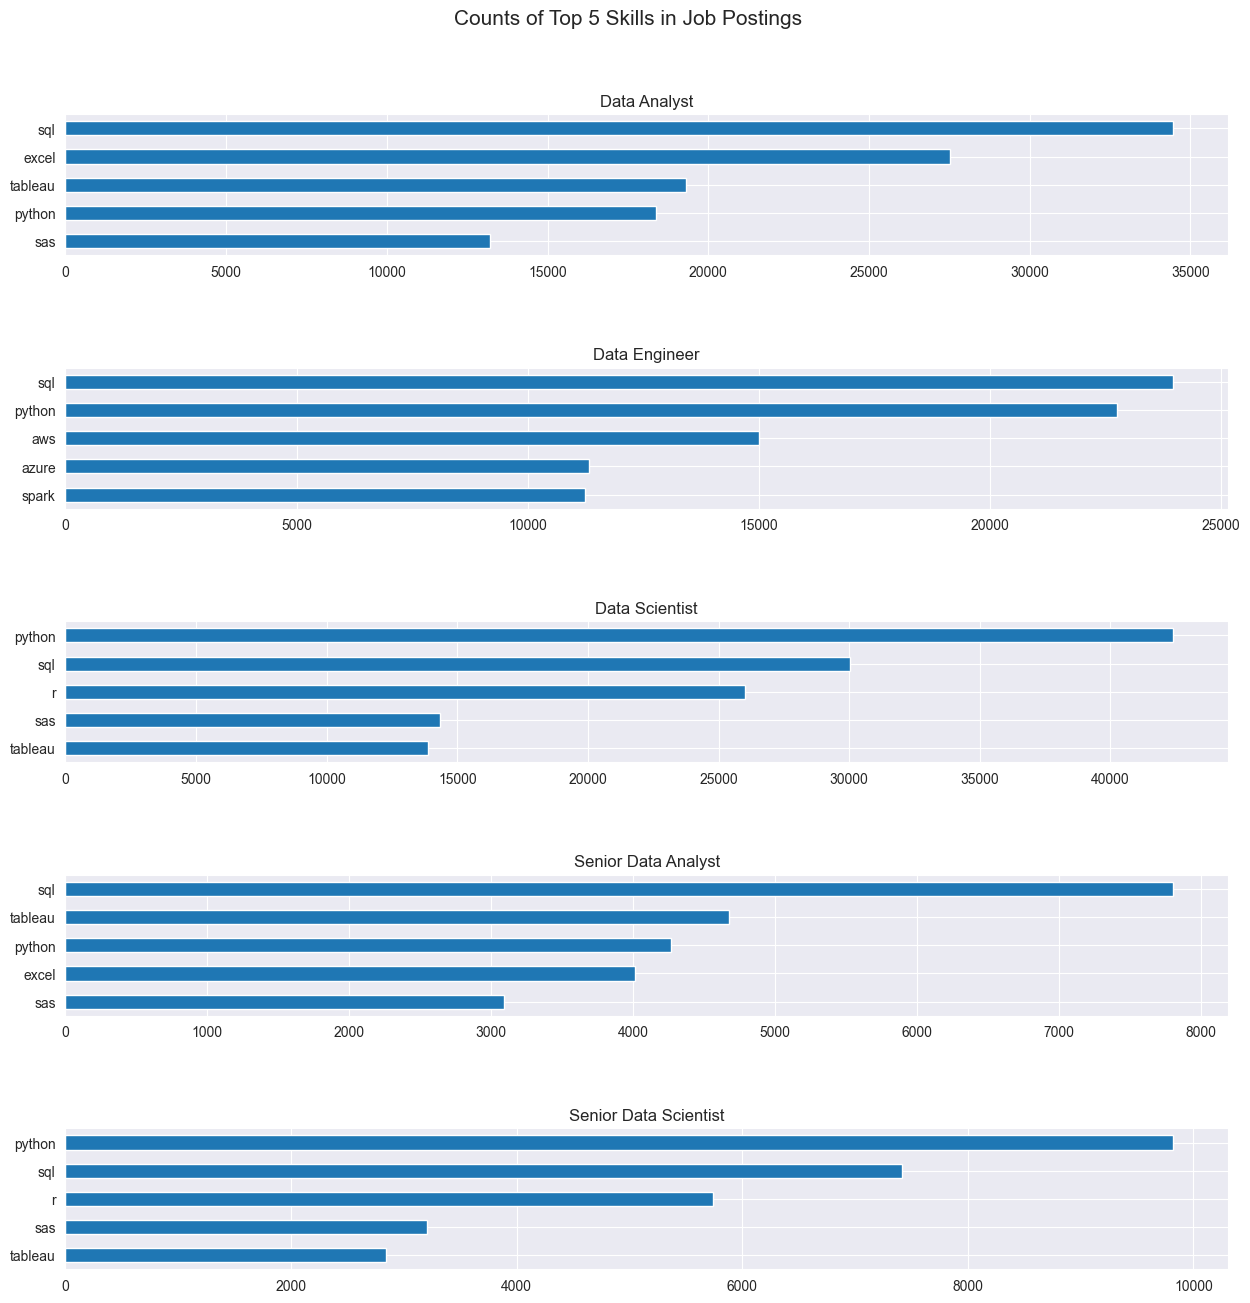

In [63]:
# Plotting the data
fig, ax = plt.subplots(len(job_titles), 1, figsize=(15, 15))

for i, job_title in enumerate(job_titles):
    dfc_plot = dfc_skills_count[dfc_skills_count['job_title_short'] == job_title].head(5)
    dfc_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

# Adding vertical spaces
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Counts of Top 5 Skills in Job Postings', fontsize=15, y=0.95)
plt.show()

In [64]:
dfc_job_title_count = dfc_US['job_title_short'].value_counts().reset_index(name='jobs_total')
# Merge 2 dataframe
dfc_skills_perc = pd.merge(dfc_skills_count, dfc_job_title_count, how='left', on='job_title_short')
dfc_skills_perc['skill_percent'] = 100 * dfc_skills_perc['skill_count'] / dfc_skills_perc['jobs_total']
dfc_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,gdpr,Software Engineer,1,1814,0.055127
1866,ggplot2,Business Analyst,1,7382,0.013546
1867,wrike,Business Analyst,1,7382,0.013546
1868,workfront,Data Engineer,1,35080,0.002851


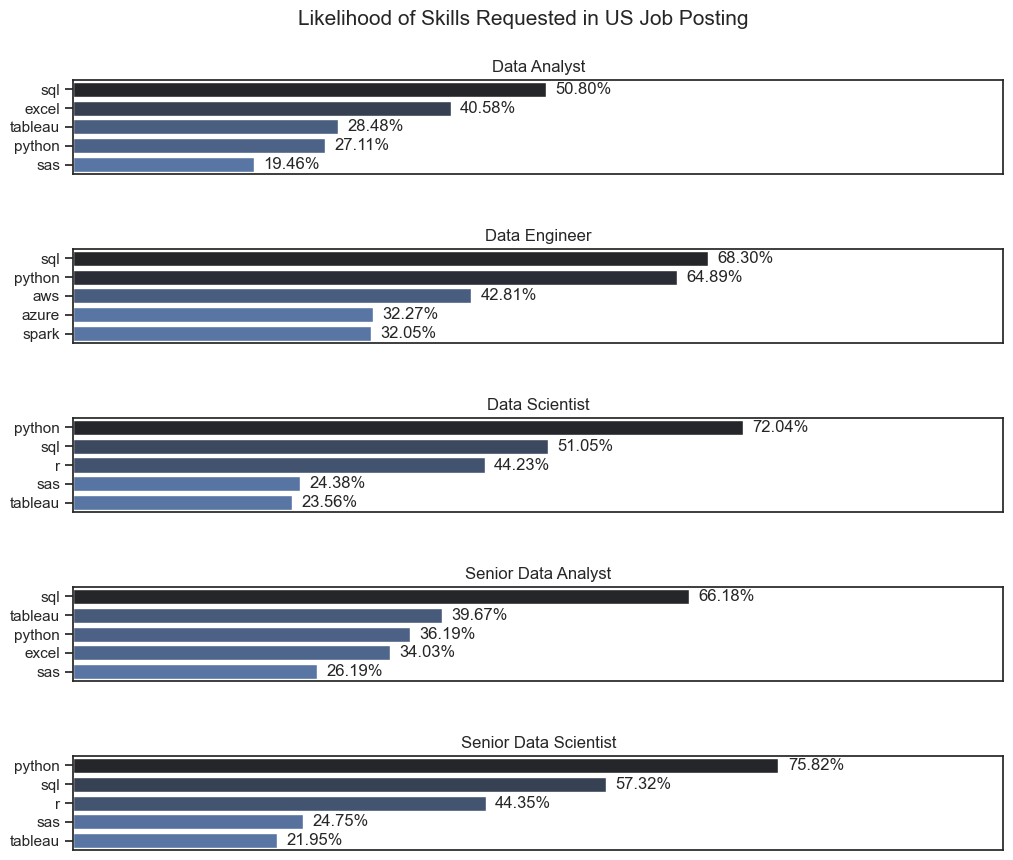

In [90]:
# Plotting the data
fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 10))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    dfc_plot = dfc_skills_perc[dfc_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=dfc_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 100)

    for n, v in enumerate(dfc_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.2f}%', va='center')

    ax[i].set_xticks([])

# Adding vertical spaces
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Likelihood of Skills Requested in US Job Posting', fontsize=15, y=0.95)
plt.show()